In [1]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/MyDrive/Colab Notebooks/Courses/DP/FinalVasin/'

Mounted at /content/drive


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

อันนี้ของผม ผมไม่รุ้จะ discuss อะไร   ไม่รุ้ด้วยว่าถูกไหม


ข้อ 1 คือ มันมี W เกินมาใน Lecture แกไม่มี แต่ก็ลองนั่งสุ่มเลขดูแล้วไม่ส่งผลไร


ข้อ 2 ผมเข้าใจว่าเอา ถ้าจัดรูปได้ family แล้ว มันจะมี parameter

แต่โดยสรุปคือเหมือนเข้า function sigmoid จริงๆมันมี stat หลากหลายแบบ แต่ละแบบมันจะให้ family ต่างกัน
ประเด็นคือ discuss ไง

น่าจะมีวิชาเปิดโลก อ่านกราฟการเกาะกลุ่มข้อมูลที่ไม่ใช่เพียงแค่ 2 มิติ แต่เป็น n มิติ

##Problem1

In [4]:
# Load Dataset
data = pd.read_csv(path+'problem1_train.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
data.corr()

,x,y
x,1.000000,0.608303
y,0.608303,1.000000


In [5]:
# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [6]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

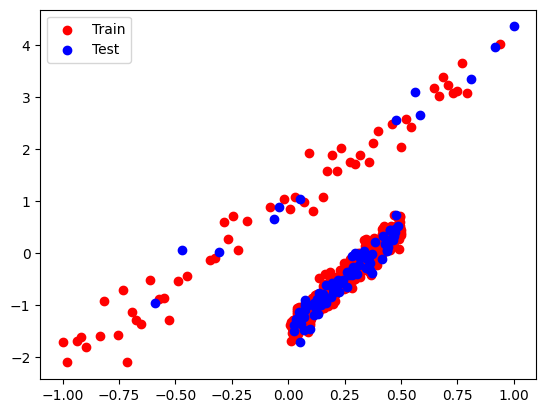

In [7]:
plt.scatter(X_train, y_train, color = 'r', label = 'Train')
plt.scatter(X_test, y_test, color = 'b', label = 'Test')
plt.legend()
plt.show()

In [8]:
# Define Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [9]:
# Weights (example values, you need to define these)

# Custom Loss Function
def custom_loss(output, target, weights):
    loss = torch.sum(weights * (output - target) ** 2)
    return loss / (2 * target.size(0))

In [10]:
# Initialize model
model = LinearRegressionModel(X_train.shape[1])

RMSE: 0.8993480801582336


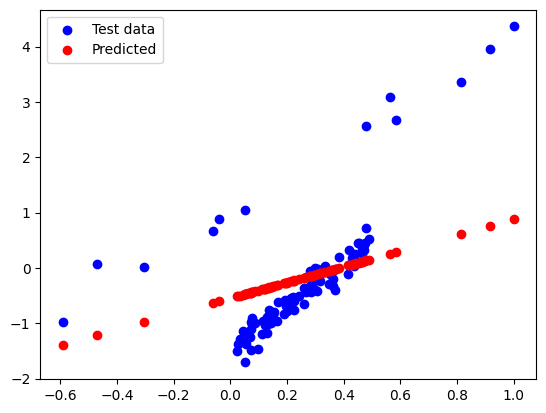

In [11]:
# Weights (example values, you need to define these)
weights = torch.ones(y_train.size())*2

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


# Training Loop
num_epochs=10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)

    loss = custom_loss(outputs, y_train, weights)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing and RMSE Calculation
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    rmse = torch.sqrt(torch.mean((predictions - y_test) ** 2))
    print(f'RMSE: {rmse.item()}')

plt.scatter(X_test, y_test, color = 'b', label = 'Test data')
with torch.no_grad():
  plt.scatter(X_test, model(X_test), color = 'r', label = 'Predicted')
plt.legend()
plt.show()

##UNDERFIT
ไม่ควรใช้ linearmodel ในการใช้งานตอบโจทย์ปัญหานี้

จากการวิเคราะห์ภาพ, ดูเหมือนว่าโมเดลมีความแม่นยำในการทำนายค่าที่ใกล้เคียงกับเส้นแนวโน้ม (trend line) ของข้อมูลจริง (สีน้ำเงิน) ในบางส่วนของชุดข้อมูล. อย่างไรก็ตาม, ยังมีจุดที่โมเดลทำนายได้ไม่แม่นยำซึ่งห่างไกลจากจุดข้อมูลจริง, โดยเฉพาะในช่วงที่ค่า X มีค่าติดลบ. ความแตกต่างระหว่างค่าทำนายและค่าจริงนี้อาจบ่งบอกถึงความแปรปรวน (variance) และความคลาดเคลื่อน (bias) ของโมเดล.

การที่จุดสีแดง (ทำนาย) ตั้งอยู่บนเส้นตรงเดียวกันอาจบ่งบอกว่าโมเดลได้เรียนรู้เพียงแนวโน้มเชิงเส้นซึ่งไม่สามารถจับคู่กับความซับซ้อนหรือความผันแปรในข้อมูลจริงได้เต็มที่. นี่อาจเป็นการบ่งชี้ว่าโมเดลต้องการการปรับแต่งเพิ่มเติม เช่น การเพิ่มความซับซ้อนให้กับโมเดลหรือการใช้โมเดลที่มีความซับซ้อนมากกว่า, การปรับพารามิเตอร์, หรือการใช้คุณสมบัติเพิ่มเติมที่อาจช่วยให้โมเดลสามารถจับคู่กับข้อมูลที่มีความซับซ้อนได้ดีขึ้น.


การเกิด underfit data เกิดขึ้นเมื่อโมเดลการเรียนรู้ (machine learning model) ไม่สามารถจับคุณลักษณะหรือโครงสร้างในข้อมูลอย่างที่ควรจะทำได้ ซึ่งสามารถเกิดขึ้นได้จากหลายปัจจัยต่าง ๆ ดังนี้:

1. การเลือกโมเดลที่ไม่เหมาะสม: การเลือกโมเดลที่ไม่เหมาะสมสำหรับปัญหาหรือข้อมูลที่มีอาการซับซ้อน เช่น การใช้โมเดลที่เรียนรู้เชิงเส้น (linear model) ในข้อมูลที่มีความซับซ้อนมาก ๆ อาจทำให้เกิด underfitting ได้.

2. ข้อมูลที่ไม่เพียงพอ: การใช้ข้อมูลที่มีจำนวนน้อยหรือข้อมูลที่ไม่เพียงพอสำหรับการเรียนรู้โมเดล อาจทำให้โมเดลไม่สามารถจับคุณลักษณะของข้อมูลได้อย่างถูกต้อง ซึ่งส่งผลให้เกิด underfitting.

3. การลดมิติ: การลดมิติของข้อมูลโดยใช้เทคนิคเช่น PCA (Principal Component Analysis) หรือการลดข้อมูลของข้อมูลเหล่านั้นอาจทำให้ข้อมูลที่เหลือน้อยเกินไปสำหรับโมเดลที่ใช้ เป็นตัวเป็นปัจจัยที่ทำให้เกิด underfitting.

4. การปรับพารามิเตอร์ไม่ถูกต้อง: การปรับค่าพารามิเตอร์ของโมเดลไม่ถูกต้องหรือไม่เหมาะสมอาจทำให้เกิด underfitting ได้ เช่น การกำหนด learning rate ของอัลกอริทึมการเรียนรู้ (learning algorithm) ได้ไม่ถูกต้อง.

5. การเลือกคุณลักษณะ (feature selection): การเลือกคุณลักษณะที่ไม่เหมาะสมหรือไม่เพียงพอสำหรับการแบ่งแยกข้อมูลอาจทำให้เกิด underfitting.

6. การตั้งค่าข้อจำกัด (constraints) บนโมเดล: การใส่ข้อจำกัดที่มากเกินไปบนโมเดลอาจทำให้โมเดลไม่สามารถหาความสัมพันธ์ในข้อมูลได้อย่างเต็มที่ และสร้างปัญหา underfitting.

การแก้ไข underfitting สามารถทำได้โดยการเลือกโมเดลที่เหมาะสมมากขึ้น, การเพิ่มข้อมูล, การเพิ่มความซับซ้อนให้กับโมเดล, การปรับค่าพารามิเตอร์ให้เหมาะสมมากขึ้น, หรือการใช้เทคนิคการลบข้อมูลผิดปกติ (outlier) หรือข้อมูลที่ไม่เกี่ยวข้องออกจากชุดข้อมูล เพื่อช่วยลดปัญหา underfitting ได้ในบางกรณีด้วย.

##problem 2

https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter8.pdf

$$
p(x;η)=b(x) \exp\left( \eta(\theta) T(x) - a(η) \right)
$$

$$
p(x | λ) = \frac{λ^x e^{-λ}}{x!}
$$

$$
p(x | \lambda) = \frac{1}{x!} e^{x\log(\lambda) - \lambda}
$$

$$
\eta = \log(\lambda)
$$

$$
T(x) = x
$$

$$
a(\eta) = \lambda = e^\eta
$$

$$
h(x) = \frac{1}{x!}
$$

$$
\lambda = e^\eta
$$

ถ้าดูจากรูปแล้วคือเราจะทำคล้ายๆกับตัว sigmoid คือยัดตัว etha ด้วยสมการ linear ลงไปมั้ง

In [12]:
from sklearn.metrics import mean_squared_error
import torch.optim as optim
import numpy as np

In [13]:
# Load the dataset
file_path_new = path+'problem2_train.csv'
data_new = pd.read_csv(file_path_new)
data_new.corr()

,x1,x2,x3,y
x1,1.000000,0.009562,0.050032,-0.348278
x2,0.009562,1.000000,-0.019324,0.423420
x3,0.050032,-0.019324,1.000000,-0.562637
y,-0.348278,0.423420,-0.562637,1.000000


In [14]:

# Splitting the dataset into training and testing sets
X = data_new[['x1', 'x2', 'x3']]
y = data_new['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y

0       8.0
1       1.0
2       8.0
3       3.0
4      10.0
       ... 
485     3.0
486     2.0
487     0.0
488     0.0
489     1.0
Name: y, Length: 490, dtype: float64

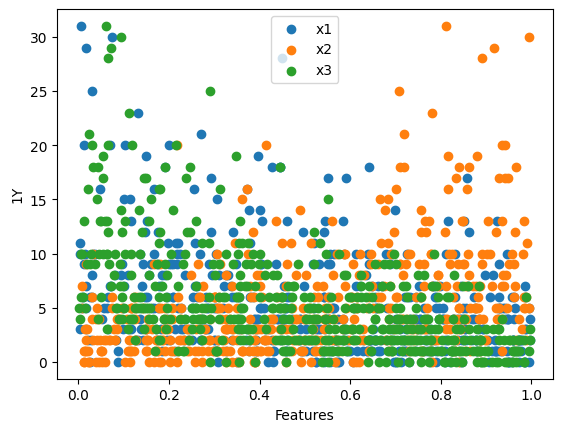

In [15]:
# Create scatter plots for each pair of features against the target variable
for feature in X:
    plt.scatter(X[feature],y, label=feature)

# Add labels and legend
plt.xlabel('Features')
plt.ylabel('1Y')
plt.legend()

# Show the plot
plt.show()

In [16]:
# Converting to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [17]:
# Defining the Poisson GLM model
class PoissonGLM(nn.Module):
    def __init__(self, input_size):
        super(PoissonGLM, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        # Applying the exponential function to ensure the output is non-negative
        return torch.exp(self.linear(x))

In [18]:
# Define the model

model = PoissonGLM(input_size=3)

In [19]:
# Loss and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.00001)  # Stochastic Gradient Descent



# Training the model
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    pred_y = model(X_train)

    # Compute and print loss
    loss = criterion(pred_y, y_train)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
with torch.no_grad():
    predicted = model(X_test).detach().numpy()
    rmse = np.sqrt(mean_squared_error(y_test, predicted))
    print(f'RMSE on the test set: {rmse:.4f}')


Epoch [100/10000], Loss: 41.5288
Epoch [200/10000], Loss: 41.3501
Epoch [300/10000], Loss: 41.1680
Epoch [400/10000], Loss: 40.9826
Epoch [500/10000], Loss: 40.7937
Epoch [600/10000], Loss: 40.6015
Epoch [700/10000], Loss: 40.4059
Epoch [800/10000], Loss: 40.2069
Epoch [900/10000], Loss: 40.0046
Epoch [1000/10000], Loss: 39.7990
Epoch [1100/10000], Loss: 39.5901
Epoch [1200/10000], Loss: 39.3781
Epoch [1300/10000], Loss: 39.1629
Epoch [1400/10000], Loss: 38.9448
Epoch [1500/10000], Loss: 38.7236
Epoch [1600/10000], Loss: 38.4997
Epoch [1700/10000], Loss: 38.2732
Epoch [1800/10000], Loss: 38.0441
Epoch [1900/10000], Loss: 37.8126
Epoch [2000/10000], Loss: 37.5791
Epoch [2100/10000], Loss: 37.3435
Epoch [2200/10000], Loss: 37.1063
Epoch [2300/10000], Loss: 36.8676
Epoch [2400/10000], Loss: 36.6277
Epoch [2500/10000], Loss: 36.3869
Epoch [2600/10000], Loss: 36.1455
Epoch [2700/10000], Loss: 35.9038
Epoch [2800/10000], Loss: 35.6621
Epoch [2900/10000], Loss: 35.4208
Epoch [3000/10000], Los

อย่างไรก็ตาม loss ไม่ลดอาจเป็นเพราะทิศทาง correlation feature x กับ y correlation ไม่มีรายการใดที่เกิน 0.8  ไม่น่าเป็นที่มาของการนำเข้ามาใช้ในการคัดเลือก feature


SGD อาจไม่เหมาะกับการค้นหา optimize ควรทำการทดลอง adam เพิ่มเติม

learning rate อาจสูงไปแต่ทดสอบใส่ให้น้อยลงก็ไม่ช่วย



เมื่อค่า loss ไม่ลดลงตั้งแต่ 100 epoch แรกในการฝึกโมเดลการเรียนรู้ (machine learning model) มีหลายเหตุผลที่อาจเกิดขึ้นได้:

1. **Learning Rate ไม่เหมาะสม:** หากค่า learning rate ที่ใช้ในการฝึกโมเดลเป็นค่าที่สูงเกินไป หรือต่ำเกินไป จะทำให้การปรับค่าพารามิเตอร์ของโมเดลไม่เป็นไปตามที่ควร และอาจทำให้ loss ไม่ลดลงตามที่คาดหวังได้ เพื่อแก้ไขปัญหานี้ควรลองปรับค่า learning rate ให้เหมาะสมกับปัญหาและโมเดลที่ใช้.

2. **โมเดลไม่เหมาะสม:** โมเดลที่ใช้อาจไม่เหมาะสมสำหรับปัญหาที่กำลังแก้ไข หรืออาจมีขนาดหรือโครงสร้างที่ไม่เหมาะสมกับข้อมูล ในกรณีนี้ควรลองใช้โมเดลที่มีความซับซ้อนมากขึ้นหรือปรับโมเดลใหม่.

3. **ข้อมูลไม่เพียงพอ:** หากมีข้อมูลน้อยเกินไปสำหรับปัญหาที่ซับซ้อน โมเดลอาจไม่สามารถเรียนรู้ความสัมพันธ์ในข้อมูลได้อย่างเพียงพอ ซึ่งอาจทำให้ loss ไม่ลดลง.

4. **Overfitting:** อาจเกิด overfitting ในรอบแรกของการฝึก โดยที่โมเดลเรียนรู้ข้อมูลในชุดฝึกได้ดีเกินไป แต่ไม่สามารถทำนายข้อมูลนอกชุดฝึกได้ดี เมื่อเริ่มฝึกโมเดล loss จะลดลง แต่หลังจากนั้น loss อาจเพิ่มขึ้นเนื่องจาก overfitting. ควรพิจารณาใช้เทคนิคการลด overfitting เช่น dropout, regularization, หรือ early stopping เพื่อป้องกันปัญหานี้.

5. **ความสุ่ม (Randomness):** การฝึกโมเดลที่มีส่วนของความสุ่มอาจทำให้ loss มีการเปลี่ยนแปลงบางครั้ง และค่า loss ไม่ลดลงตามรอบฝึกนั้น ๆ อาจเป็นผลจากความสุ่มในกระบวนการฝึกโมเดล.

6. **การตั้งค่าไม่ถูกต้อง:** ค่าพารามิเตอร์อื่น ๆ ที่ใช้ในโมเดลหรือในกระบวนการฝึกอาจต้องการการตั้งค่าที่ถูกต้อง เช่น จำนวนเลเยอร์ การใช้ฟังก์ชันกิจกรรม (activation functions) และอื่น ๆ อาจมีผลต่อการลด loss และควรถูกตรวจสอบและปรับแต่งตามความเหมาะสม.

การแก้ไขปัญหา loss ที่ไม่ลดลงตั้งแต่ 100 epoch แรกควรเริ่มด้วยการตรวจสอบและปรับปรุงปัญหาที่อาจทำให้เกิดขึ้น และลองวิเคราะห์ข้อมูลและโมเดลอีกครั้งเพื่อค้นหาวิธีการแก้ไขที่เหมาะสมในกรณีนั้น.
